In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


(315, 474, 3)


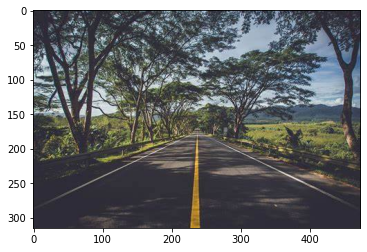

In [2]:
# Read the image
image_c = mpimg.imread('straight.jpg')
plt.imshow(image_c)
print(image_c.shape)

(315, 474)

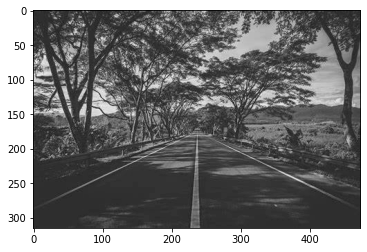

In [3]:
# RGB to Grayscale
image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
plt.imshow(image_g, cmap='gray')
image_g.shape

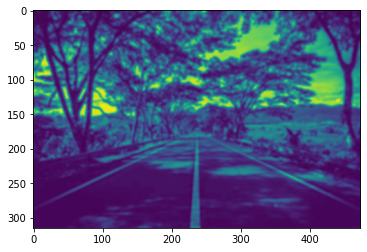

In [4]:
# Gaussian blurring and Canny
"""Blurring"""
image_blur = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blur)

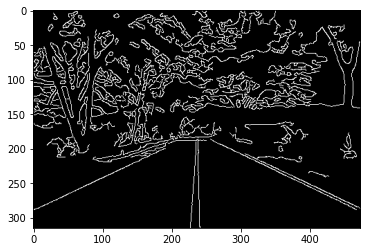

In [5]:
threshold_low = 10
threshold_high = 200

"""Identifying lines"""
image_canny = cv2.Canny(image_blur, threshold_low, threshold_high)
plt.imshow(image_canny, cmap='gray')

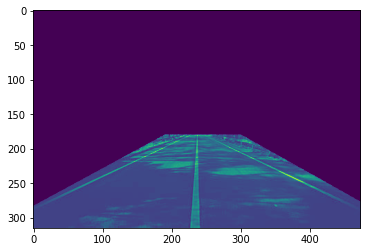

In [32]:
# Define the region of interest
# edit depending on the image = bRight, tRight, tLeft, bLeft
vertices = np.array([[(-70, 320), (190, 180), (300, 180), (550, 320)]], dtype=np.int32) # Part of interest on the road
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

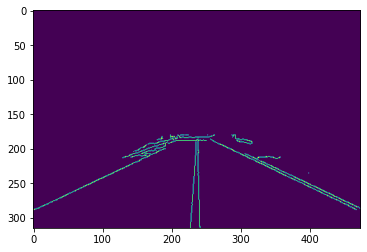

In [34]:
# Plot the lines in the filtered image
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

In [104]:
# Hough lines detection and drawing  *changeable for different results*
rho = 2  # distance resolution in pixels
theta = np.pi / 180  # angular resolution in radians
threshold = 90  # Minimum number of intersects to make a line
min_line_len = 115  # Minimum number of pixels to make a line
max_line_gap = 40  # Max gaps in pixels between connected lines
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                        maxLineGap=max_line_gap)

# Create a blank image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20) # img, start point, end point, colour

lines

array([[[  0, 288, 226, 183]],

       [[249, 183, 466, 288]],

       [[227, 314, 237, 183]],

       [[236, 183, 241, 314]],

       [[190, 188, 313, 188]]], dtype=int32)

In [105]:
a = 1  # alpha
b = 1  # beta
y = 0  # gamma

# Calculation of resultant image/ Merging original with blank = original_img * a + blank * b + y
image_with_lines = cv2.addWeighted(image_c, a, line_image, b, y)


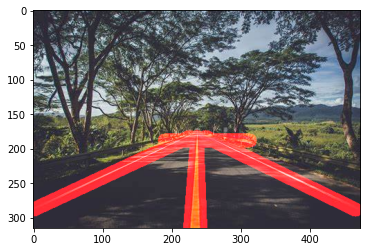

In [106]:
# Plot the final image
plt.figure()
plt.imshow(image_with_lines)